In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv ("household_power_consumption.txt", sep=";",
                    header=0, low_memory=False, infer_datetime_format=True, 
                    parse_dates={"datetime":[0,1]},index_col=["datetime"])

In [3]:
df.head(3)
df.shape

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


(2075259, 7)

In [4]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
import pandas_profiling as pp

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof
#prof.to_file(output_file='output.html')

In [7]:
count_na = 0
for values in df.values.tolist():
    for value in values:
        if value == '?':
            count_na += 1
        else:
            continue
            
print(count_na)

155874


In [6]:
df.replace("?", np.nan, inplace = True)

df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    df[[column]] = df[[column]].astype('float')

In [8]:
df= df.fillna(method='ffill')
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df_new = df.copy()
df_new['active_energy_consumed'] = df_new.apply(lambda row: row.Global_active_power  * 1000/60 - row.Sub_metering_1 
                                        - row.Sub_metering_2 - row.Sub_metering_3, axis=1)
df_new.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumed
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


Time Series Specific Exploratory Methods

In [10]:
import statsmodels.api as sm

from pylab import rcParams 

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


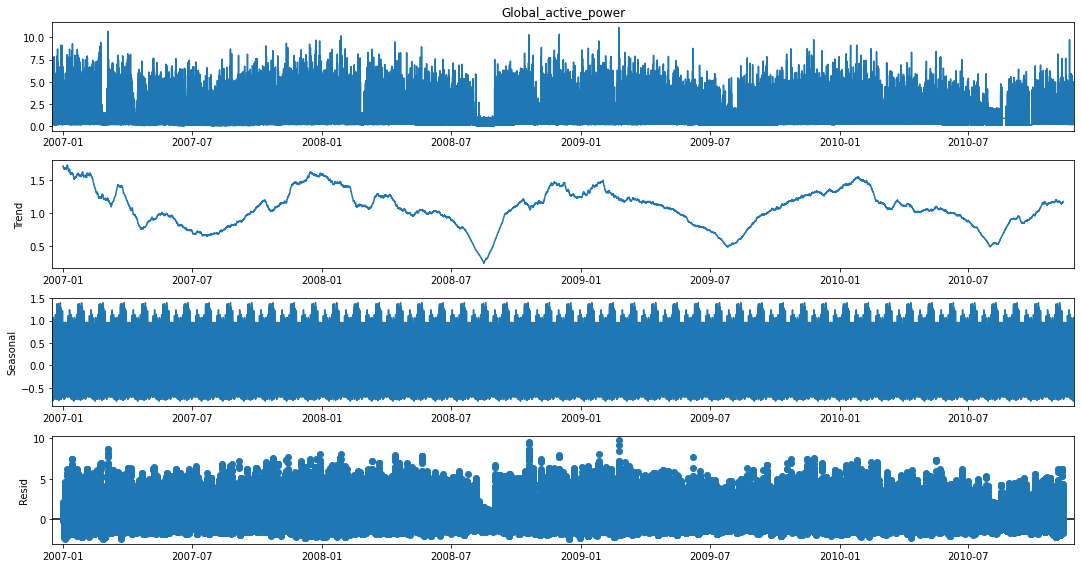

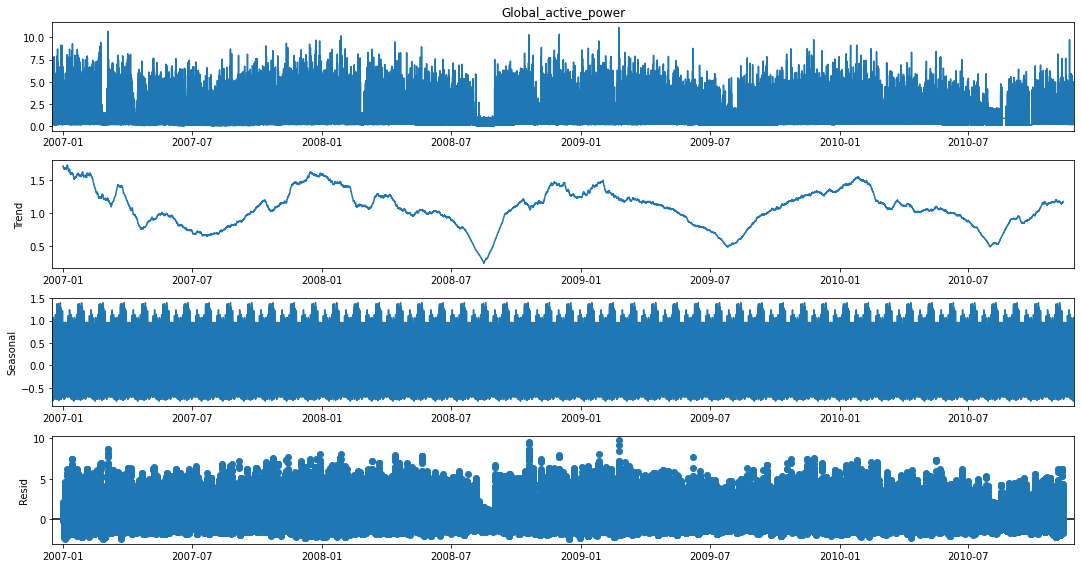

In [13]:
rcParams['figure.figsize'] = 15, 8

#60 mins, 24 hrs, 30 days = 43200
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], freq = 43200, model='additive')
decompose_series.plot()
plt.show()

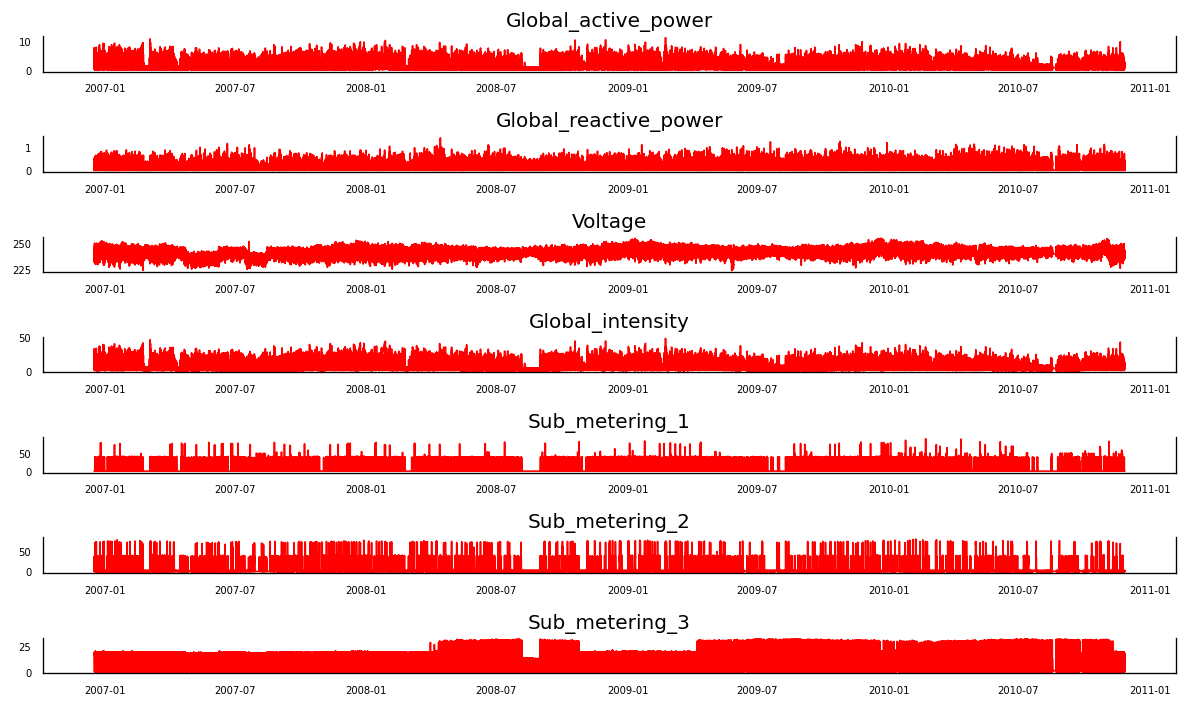

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, '2007')

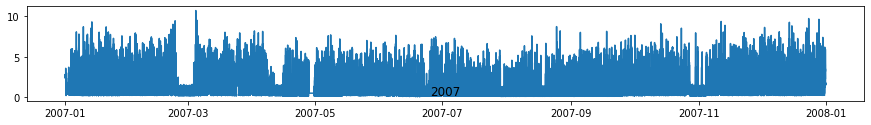

Text(0.5, 0, '2008')

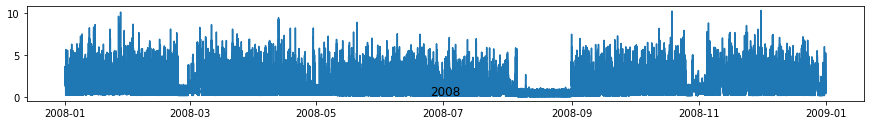

Text(0.5, 0, '2009')

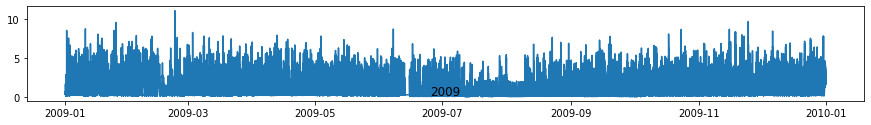

Text(0.5, 0, '2010')

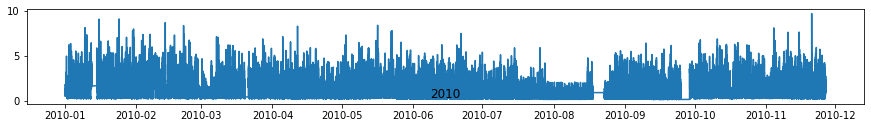

In [15]:
years = ["2007", "2008", "2009", "2010"]
plt.figure()

for i in range(len(years)):
    ax=plt.subplot(len(years), 1, i+1)
    year =years[i]
    result=df[str(year)] #yearly observations
    plt.plot(result["Global_active_power"])
    plt.title(str(year), y=0, loc="center")
    plt.show()

In [11]:
#Downsample 
df_daily = df.resample('D').mean()
df_daily.head(3)
df_daily.isna().sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -3.734758680846018
p-value: 0.0036499731073697025
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


From the results obtained, the p-value is greater than the critical value at 0.05,

the ADF statistic is less than that any of the critical values obtain.
#This confirms that the series is indeed stationary.

In [13]:
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ValueError: x is required to have ndim 1 but has ndim 2

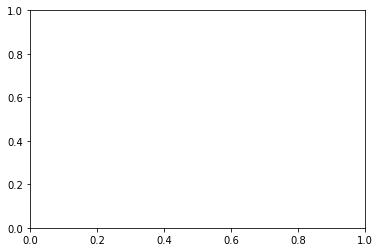

In [18]:
 #ACF - Autocorrelation Function AR P
df_ddiff = df_daily
plot_acf(df_ddiff, lags = range(0, 20))
plt.show()

#PACF - Partial Autocorrelation Function MA Q
plot_pacf(df_ddiff, lags = range(0, 20))
plt.show()

In [124]:
#Downsample 
df_monthly = df.resample('M').mean()
df_monthly.head(3)
df_monthly.isna().sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847
2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759
2007-02-28,1.401165,0.113634,240.519177,5.914911,1.180159,1.602282,6.704067


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -4.6164684157518145
p-value: 0.00012043644200149809
No. of lags used: 9
No. of observations used : 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418


From the results obtained, the p-value is greater than the critical value at a 0.05

#the ADF statistic is less than that any of the critical values obtain.
#This confirms that the series is non-stationary.

In [20]:
df_monthly = df_monthly.reset_index()
df_monthly.head(2)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847
1,2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759


In [21]:
df_monthly= df_monthly[["datetime", "Global_active_power"]]
df_monthly.head(2)

,datetime,Global_active_power
0,2006-12-31,1.901537
1,2007-01-31,1.546085


In [22]:
df_monthly.shape

df_monthly =df_monthly.rename(columns={"datetime": "ds", "Global_active_power": "y"}) 
df_monthly = df_monthly[["ds","y"]]
df_monthly.head(3)

(48, 2)

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165


In [23]:
from fbprophet import Prophet

model = Prophet()
model.fit(df_monthly)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
 #predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.170982,1.534390,1.730072,1.170982,1.170982,0.461804,0.461804,0.461804,0.461804,0.461804,0.461804,0.0,0.0,0.0,1.632786
1,2007-01-31,1.168197,1.394145,1.593752,1.168197,1.168197,0.323716,0.323716,0.323716,0.323716,0.323716,0.323716,0.0,0.0,0.0,1.491913
2,2007-02-28,1.165681,1.318920,1.512315,1.165681,1.165681,0.250739,0.250739,0.250739,0.250739,0.250739,0.250739,0.0,0.0,0.0,1.416420
3,2007-03-31,1.162896,1.168593,1.359107,1.162896,1.162896,0.103693,0.103693,0.103693,0.103693,0.103693,0.103693,0.0,0.0,0.0,1.266589
4,2007-04-30,1.160201,0.857954,1.054383,1.160201,1.160201,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,0.0,0.0,0.0,0.957264
5,2007-05-31,1.157416,0.991449,1.183614,1.157416,1.157416,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,0.0,0.0,0.0,1.091149
6,2007-06-30,1.154720,0.809921,1.011018,1.154720,1.154720,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,0.0,0.0,0.0,0.910971
7,2007-07-31,1.151935,0.608373,0.804212,1.151935,1.151935,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,0.0,0.0,0.0,0.705883
8,2007-08-31,1.149150,0.725699,0.918699,1.149150,1.149150,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,0.0,0.0,0.0,0.822080
9,2007-09-30,1.146455,0.827762,1.015787,1.146455,1.146455,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,0.0,0.0,0.0,0.913194


In [25]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.632786,1.534390,1.730072,1.170982,1.170982,1.170982
1,2007-01-31,1.491913,1.394145,1.593752,1.168197,1.168197,1.168197
2,2007-02-28,1.416420,1.318920,1.512315,1.165681,1.165681,1.165681
3,2007-03-31,1.266589,1.168593,1.359107,1.162896,1.162896,1.162896
4,2007-04-30,0.957264,0.857954,1.054383,1.160201,1.160201,1.160201
5,2007-05-31,1.091149,0.991449,1.183614,1.157416,1.157416,1.157416
6,2007-06-30,0.910971,0.809921,1.011018,1.154720,1.154720,1.154720
7,2007-07-31,0.705883,0.608373,0.804212,1.151935,1.151935,1.151935
8,2007-08-31,0.822080,0.725699,0.918699,1.149150,1.149150,1.149150
9,2007-09-30,0.913194,0.827762,1.015787,1.146455,1.146455,1.146455


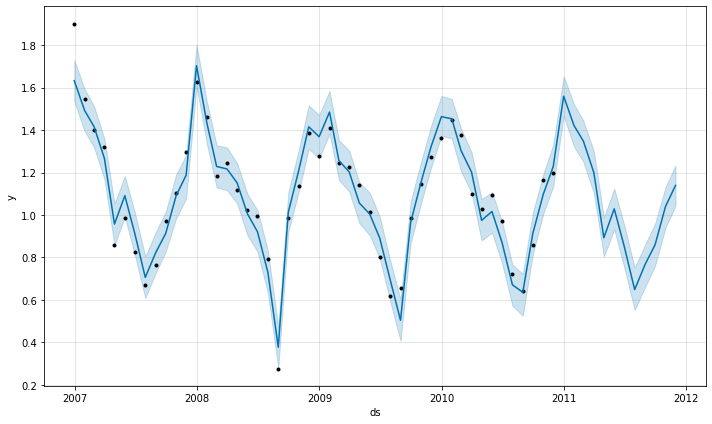

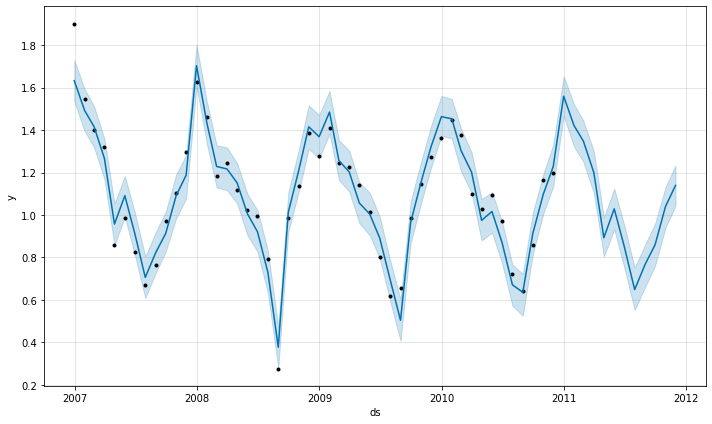

In [26]:
model.plot(forecast)

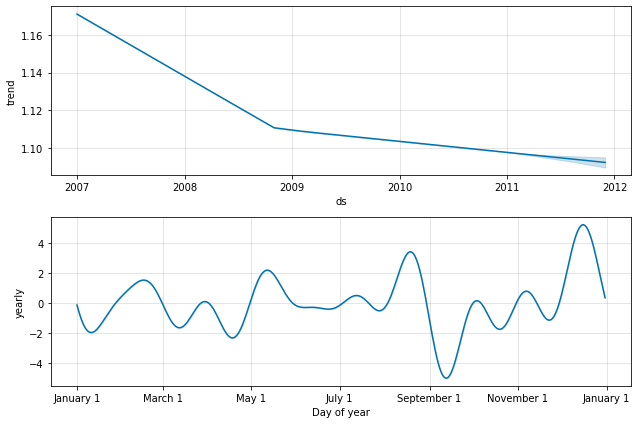

In [27]:
model.plot_components(forecast);

In [28]:
metric_dfd = forecast.set_index('ds')[['yhat']].join(df_monthly.set_index('ds').y).reset_index()
metric_dfd.head(3)
metric_dfd.tail(3)

,ds,yhat,y
0,2006-12-31,1.632786,1.901537
1,2007-01-31,1.491913,1.546085
2,2007-02-28,1.416420,1.401165


,ds,yhat,y
57,2011-09-30,0.860232,NaN
58,2011-10-31,1.039923,NaN
59,2011-11-30,1.139371,NaN


In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

metric_dfd.dropna(inplace=True)
r2_score(metric_dfd.y, metric_dfd.yhat)
mean_squared_error(metric_dfd.y, metric_dfd.yhat)
mean_absolute_error(metric_dfd.y, metric_dfd.yhat)

0.9338781296838371

0.005856285264135434

0.061774954877880116

In [30]:
import ml_metrics as metrics

metrics.mae(metric_dfd.y, metric_dfd.yhat)

metrics.rmse(metric_dfd.y, metric_dfd.yhat)

0.061774954877880116

0.07652636973054082

In [31]:
x = metric_dfd.y
y = metric_dfd.yhat

def mape (x, y):
    x, y = np.array(x), np.array(y)
    return np.mean(np.abs((x - y) / y)) *100

mape(x, y)

6.363514005255104

In [105]:
df_daily = df_daily.reset_index()

df_daily= df_daily[["datetime", "Global_active_power"]]
df_daily.head(2)

KeyError: "None of [Index(['datetime', 'Global_active_power'], dtype='object')] are in the [columns]"

In [106]:
df_daily.shape

df_daily =df_daily.rename(columns={"datetime": "ds", "Global_active_power": "y"}) 
df_daily = df_daily[["ds","y"]]
df_daily.head(3)

(1442, 3)

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435


In [126]:
from fbprophet import Prophet

model2 = Prophet()
model2.fit(df_daily) 
    
#predict for the next 30 days
future2 = model2.make_future_dataframe(periods=30, freq='D') 
forecast2 = model2.predict(future2) 
forecast2.head(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.224343,1.342248,2.106797,1.224343,1.224343,0.510034,0.510034,0.510034,0.149855,0.149855,0.149855,0.360180,0.360180,0.360180,0.0,0.0,0.0,1.734377
1,2006-12-17,1.223510,1.318318,2.073304,1.223510,1.223510,0.485103,0.485103,0.485103,0.116031,0.116031,0.116031,0.369072,0.369072,0.369072,0.0,0.0,0.0,1.708613
2,2006-12-18,1.222677,1.141587,1.858621,1.222677,1.222677,0.283590,0.283590,0.283590,-0.094312,-0.094312,-0.094312,0.377902,0.377902,0.377902,0.0,0.0,0.0,1.506267
3,2006-12-19,1.221844,1.224357,1.961072,1.221844,1.221844,0.366385,0.366385,0.366385,-0.020032,-0.020032,-0.020032,0.386418,0.386418,0.386418,0.0,0.0,0.0,1.588230
4,2006-12-20,1.221011,1.225925,1.977763,1.221011,1.221011,0.391995,0.391995,0.391995,-0.002377,-0.002377,-0.002377,0.394372,0.394372,0.394372,0.0,0.0,0.0,1.613006
5,2006-12-21,1.220179,1.144637,1.874372,1.220179,1.220179,0.296374,0.296374,0.296374,-0.105154,-0.105154,-0.105154,0.401528,0.401528,0.401528,0.0,0.0,0.0,1.516553
6,2006-12-22,1.219346,1.218655,1.981105,1.219346,1.219346,0.363659,0.363659,0.363659,-0.044011,-0.044011,-0.044011,0.407670,0.407670,0.407670,0.0,0.0,0.0,1.583005
7,2006-12-23,1.218513,1.436058,2.143103,1.218513,1.218513,0.562464,0.562464,0.562464,0.149855,0.149855,0.149855,0.412609,0.412609,0.412609,0.0,0.0,0.0,1.780977
8,2006-12-24,1.217680,1.369666,2.138374,1.217680,1.217680,0.532221,0.532221,0.532221,0.116031,0.116031,0.116031,0.416190,0.416190,0.416190,0.0,0.0,0.0,1.749901
9,2006-12-25,1.216847,1.178436,1.924884,1.216847,1.216847,0.323980,0.323980,0.323980,-0.094312,-0.094312,-0.094312,0.418292,0.418292,0.418292,0.0,0.0,0.0,1.540827


In [108]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1.734377,1.346510,2.098939,1.224343,1.224343,1.224343
1,2006-12-17,1.708613,1.315411,2.055863,1.223510,1.223510,1.223510
2,2006-12-18,1.506267,1.141382,1.868779,1.222677,1.222677,1.222677
3,2006-12-19,1.588230,1.198835,1.980193,1.221844,1.221844,1.221844
4,2006-12-20,1.613006,1.226119,1.996218,1.221011,1.221011,1.221011
...,...,...,...,...,...,...,...
1467,2010-12-22,1.486636,1.104982,1.843317,1.081343,1.081096,1.081593
1468,2010-12-23,1.388811,1.020915,1.762088,1.081355,1.081074,1.081635
1469,2010-12-24,1.453545,1.067471,1.792813,1.081366,1.081034,1.081661
1470,2010-12-25,1.649525,1.299345,2.035730,1.081378,1.081023,1.081706


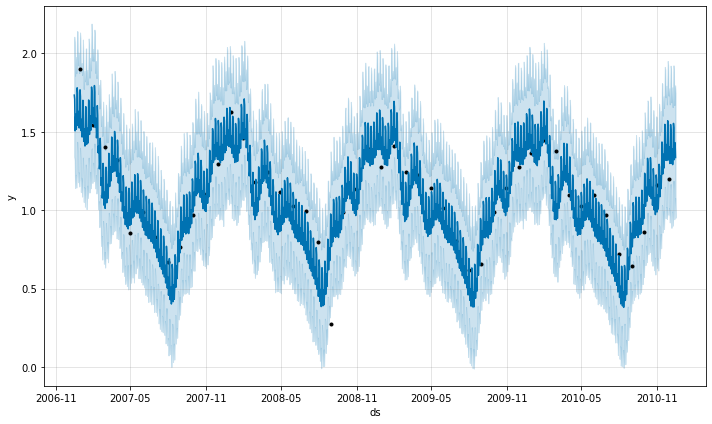

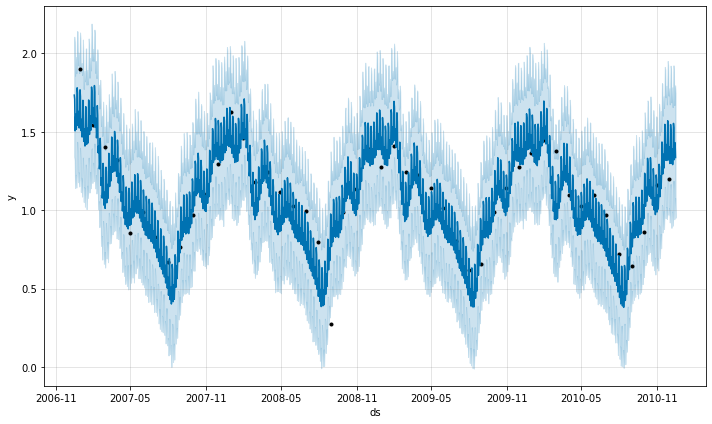

In [127]:
model.plot(forecast2)
plt.show()

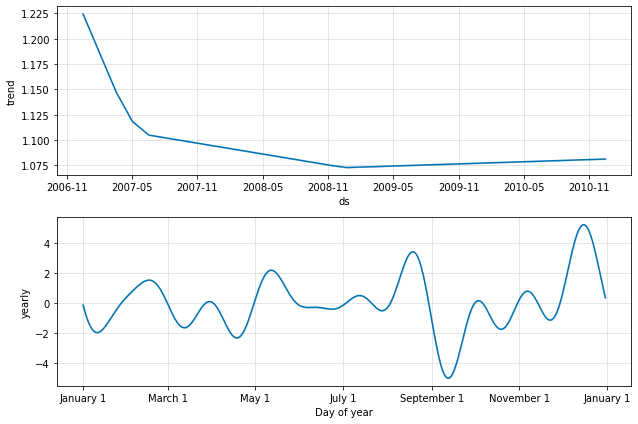

In [128]:
model.plot_components(forecast2);

In [129]:
metric_df = forecast2.set_index('ds')[['yhat']].join(df_daily.set_index('ds').y).reset_index()

In [130]:
metric_df.head(3)
metric_df.tail(3)

,ds,yhat,y
0,2006-12-16,1.734377,3.053475
1,2006-12-17,1.708613,2.354486
2,2006-12-18,1.506267,1.530435


,ds,yhat,y
1459,2010-12-14,1.404414,NaN
1460,2010-12-15,1.430360,NaN
1461,2010-12-16,1.336299,NaN


In [131]:
metric_df.dropna(inplace=True)

In [132]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [133]:
r2_score(metric_df.y, metric_df.yhat)

0.5051377190724484

In [134]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.08826369846963723

Remember...for MSE, closer to zero is better.

In [135]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.2210171343363617

Another approach for metrics

In [136]:
import ml_metrics as metrics

In [137]:
metrics.mae(metric_df.y, metric_df.yhat)

0.2210171343363617

In [138]:
metrics.ae(metric_df.y, metric_df.yhat)

array([1.31909737, 0.64587325, 0.0241676 , ..., 0.17165361, 0.32370422,
       0.20026413])

In [139]:
metrics.rmse(metric_df.y, metric_df.yhat)

0.29709207069465393

In [140]:
x1 = metric_df.y
y1 = metric_df.yhat

In [141]:
def mape (x1, y1):
    x1, y1 = np.array(x1), np.array(y1)
    return np.mean(np.abs((x1 - y1) / y1)) *100

In [142]:
mape(x1, y1)

21.302448959614892